## Question 1

In [2]:
import networkx as nx
import gzip

# Load the Facebook network from the provided edgelist
with gzip.open('./facebook_combined.txt.gz', 'rt') as f:
    G = nx.read_edgelist(f, nodetype=int)

# Compute basic properties
num_nodes = G.number_of_nodes()
num_edges = G.number_of_edges()
is_connected = nx.is_connected(G)
size_gcc = max(len(c) for c in nx.connected_components(G))

# Display results
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")
print(f"Is the network connected? {is_connected}")
print(f"Size of the Giant Connected Component (GCC): {size_gcc}")

Number of nodes: 4039
Number of edges: 88234
Is the network connected? True
Size of the Giant Connected Component (GCC): 4039


## Question 2

In [6]:
import networkx as nx
import gzip

# Load the Facebook network
with gzip.open('./facebook_combined.txt.gz', 'rt') as f:
    G = nx.read_edgelist(f, nodetype=int)

print("Nodes:", G.number_of_nodes(), "Edges:", G.number_of_edges())
# Compute eccentricities
ecc = nx.eccentricity(G)
diameter = max(ecc.values())
print("Computed diameter:", diameter)

Nodes: 4039 Edges: 88234
Computed diameter: 8


## Question 3

Average degree: 43.6910


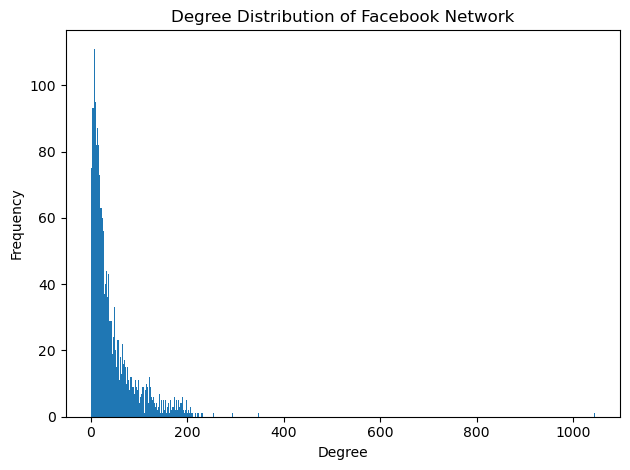

In [5]:
import networkx as nx
import gzip
import matplotlib.pyplot as plt

# Load the Facebook network
with gzip.open('./facebook_combined.txt.gz', 'rt') as f:
    G = nx.read_edgelist(f, nodetype=int)

# Compute degree list and average degree
degrees = [d for _, d in G.degree()]
avg_degree = sum(degrees) / len(degrees)

# Plot degree distribution histogram
plt.figure()
plt.hist(degrees, bins=range(min(degrees), max(degrees) + 1))
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Degree Distribution of Facebook Network')
plt.tight_layout()

# Display the plot and average degree
print(f"Average degree: {avg_degree:.4f}")

## Question 4

Estimated slope of the fit line: -1.1802


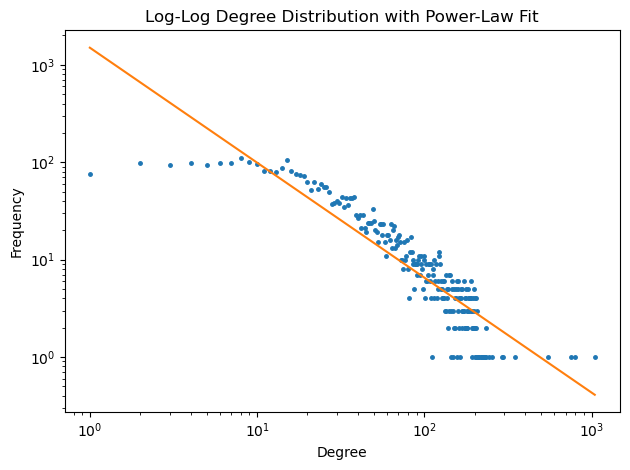

In [8]:
import networkx as nx
import gzip
import numpy as np
import matplotlib.pyplot as plt

# Load the Facebook network
with gzip.open('./facebook_combined.txt.gz', 'rt') as f:
    G = nx.read_edgelist(f, nodetype=int)

# Compute degree list and degree counts
degrees = [d for _, d in G.degree()]
unique_degrees, counts = np.unique(degrees, return_counts=True)

# Filter out zero degrees for log-log plot
mask = unique_degrees > 0
x = unique_degrees[mask]
y = counts[mask]

# Fit a line in log-log space
log_x = np.log(x)
log_y = np.log(y)
slope, intercept = np.polyfit(log_x, log_y, 1)

# Plot degree distribution in log-log scale with fit line
plt.figure()
plt.loglog(x, y, '.', markersize=5)
x_line = np.linspace(x.min(), x.max(), 100)
y_line = np.exp(intercept) * x_line**slope
plt.loglog(x_line, y_line)
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.title('Log-Log Degree Distribution with Power-Law Fit')
plt.tight_layout()

print(f"Estimated slope of the fit line: {slope:.4f}")

## Question 5

In [10]:
import networkx as nx
import gzip

# Load the Facebook network
with gzip.open('./facebook_combined.txt.gz', 'rt') as f:
    G = nx.read_edgelist(f, nodetype=int)

# Create personalized network for graph node ID 1 (edgelist node 0)
ego_net = nx.ego_graph(G, 0, radius=1)

# Compute number of nodes and edges
num_nodes_ego = ego_net.number_of_nodes()
num_edges_ego = ego_net.number_of_edges()

print(f"Personalized network nodes: {num_nodes_ego}")
print(f"Personalized network edges: {num_edges_ego}")

Personalized network nodes: 348
Personalized network edges: 2866


## Question 6

Diameter of the personalized network (user ID 1):

ℎ = 2

Trivial bounds for the diameter:

Lower bound: 1 (any non‑trivial connected graph with at least one edge has diameter ≥ 1)

Upper bound: 347 (in the worst case, a path graph on 348 nodes has diameter = 348 − 1 = 347)

## Question 7

Diameter = upper bound (2):
This means there is at least one pair of the user’s friends (neighbors) who are not directly connected to each other. To go from one of those friends to the other, you must pass through the central user. In other words, not all of the user’s friends are mutual friends.

Diameter = lower bound (1):
This means every pair of nodes in the personalized network is directly adjacent. In particular, every friend of the user is also friends with every other friend. The ego plus its neighbors therefore form a clique of mutual friendships.

## Question 8

In [12]:
import networkx as nx
import gzip

# Load the Facebook network
with gzip.open('./facebook_combined.txt.gz', 'rt') as f:
    G = nx.read_edgelist(f, nodetype=int)

# Identify core nodes (degree > 200)
degrees = dict(G.degree())
core_nodes = [node for node, deg in degrees.items() if deg > 200]

# Compute number of core nodes and their average degree
num_core_nodes = len(core_nodes)
avg_core_degree = sum(degrees[node] for node in core_nodes) / num_core_nodes

print(f"Number of core nodes (degree > 200): {num_core_nodes}")
print(f"Average degree of core nodes: {avg_core_degree:.2f}")

Number of core nodes (degree > 200): 40
Average degree of core nodes: 279.38


## Question 9

Node 1 — Fast-Greedy Q=0.413, Edge-Betweenness Q=0.353, Infomap Q=0.389


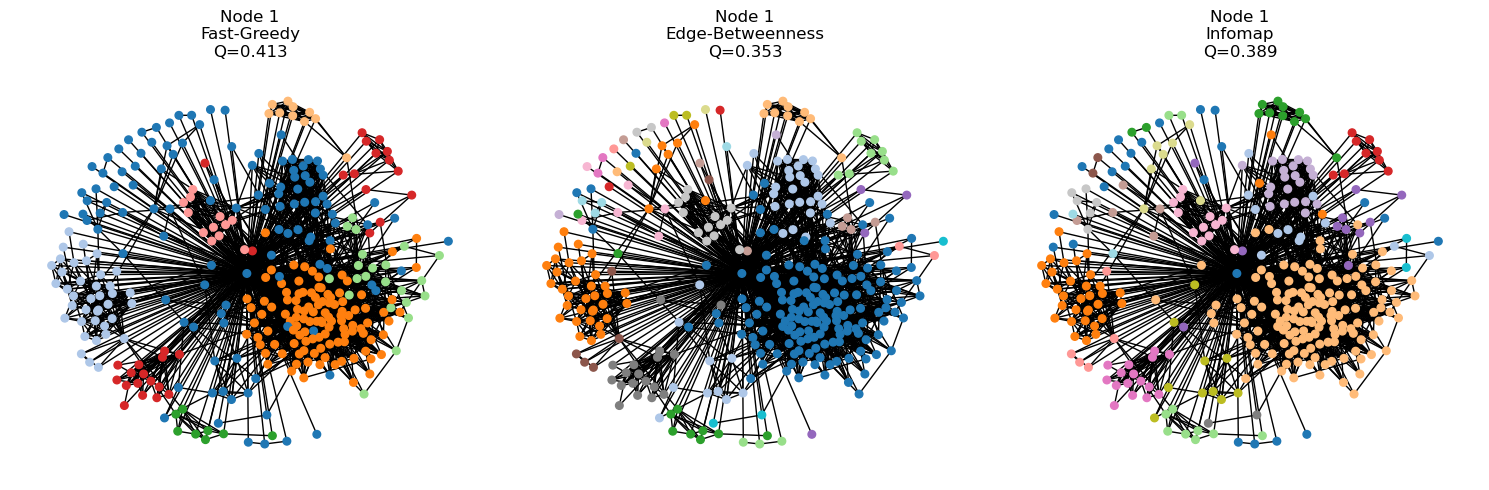

Node 108 — Fast-Greedy Q=0.437, Edge-Betweenness Q=0.507, Infomap Q=0.508


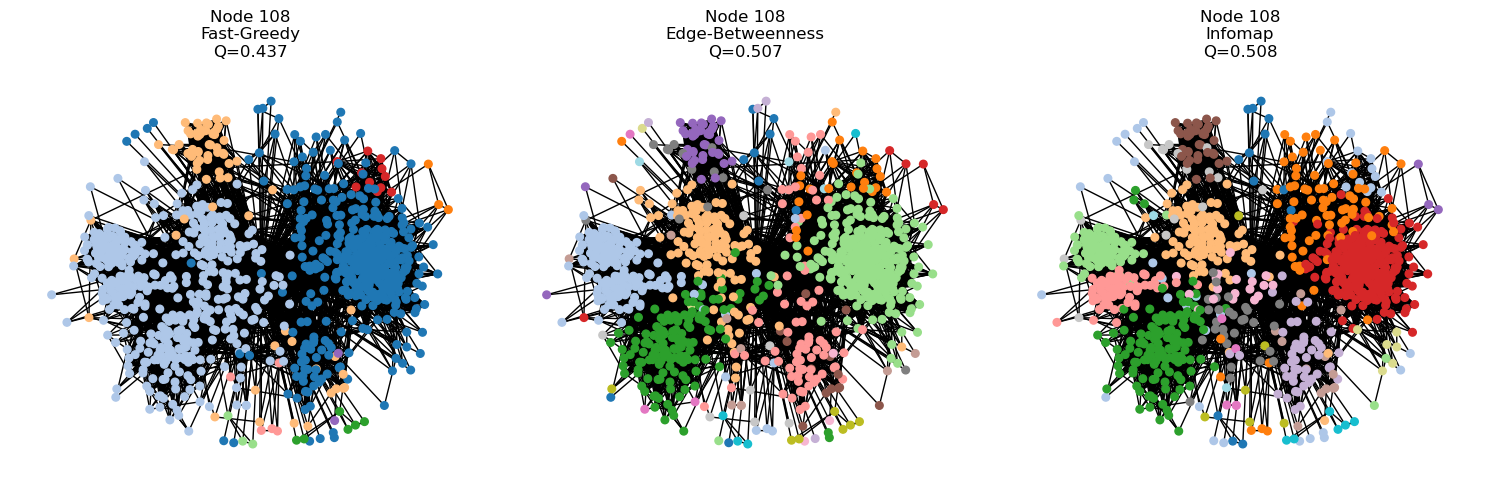

Node 349 — Fast-Greedy Q=0.250, Edge-Betweenness Q=0.134, Infomap Q=0.095


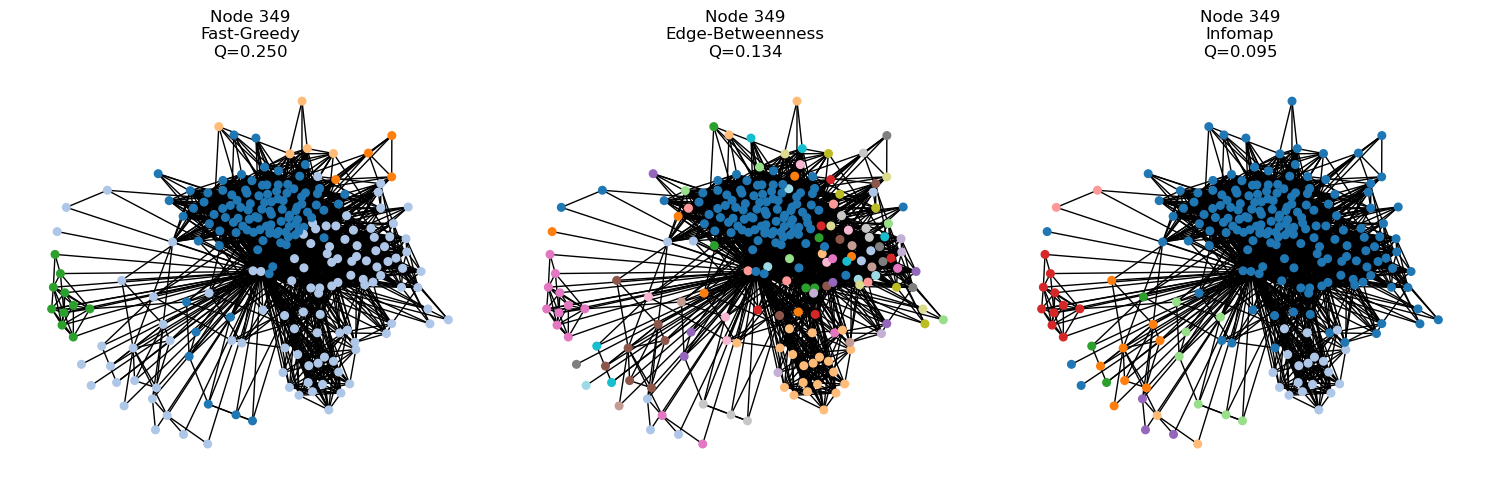

Node 484 — Fast-Greedy Q=0.507, Edge-Betweenness Q=0.489, Infomap Q=0.515


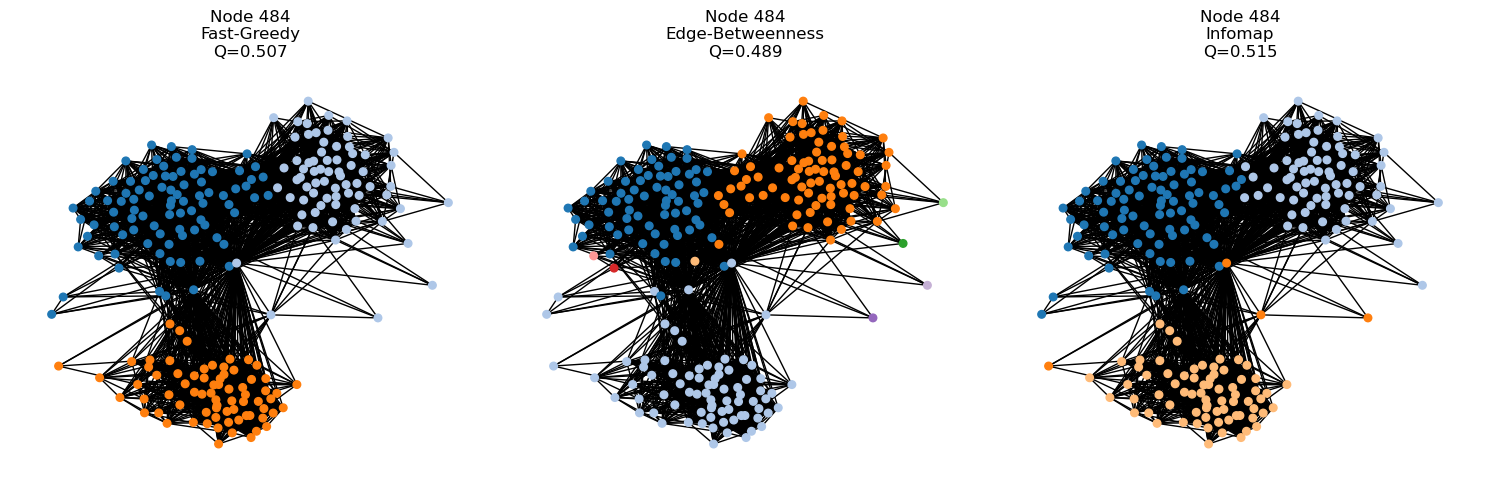

Node 1087 — Fast-Greedy Q=0.146, Edge-Betweenness Q=0.028, Infomap Q=0.027


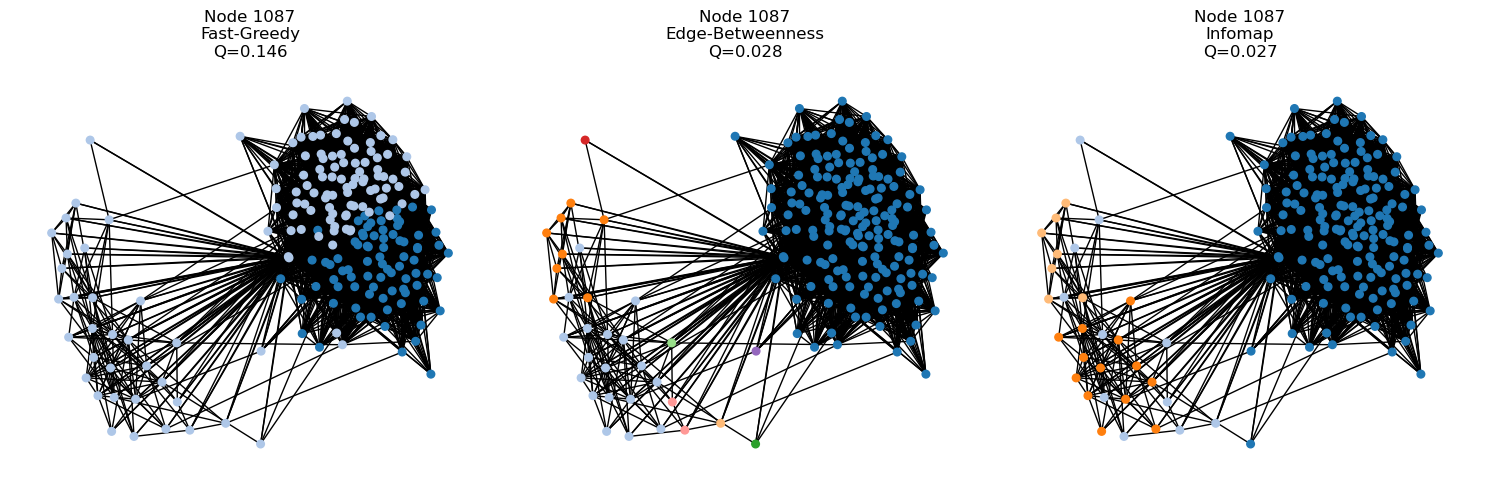

In [1]:
import gzip
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt

# （1）加载 Facebook 网络
with gzip.open('./facebook_combined.txt.gz','rt') as f:
    G_nx = nx.read_edgelist(f, nodetype=int)

# （2）要分析的核心节点（R 里的 c(1,108,349,484,1087)）
core_ids_proj = [1, 108, 349, 484, 1087]
# 转为 0-based edgelist ID
core_ids = [i - 1 for i in core_ids_proj]

for nid in core_ids:
    # （3）构建 ego‐network
    ego_nx = nx.ego_graph(G_nx, nid, radius=1)
    # 转 igraph
    ig_g = ig.Graph.TupleList(ego_nx.edges(), directed=False)
    
    # （4）三种算法
    fg = ig_g.community_fastgreedy().as_clustering()
    eb = ig_g.community_edge_betweenness().as_clustering()
    im = ig_g.community_infomap()
    
    # 计算模块度
    q_fg = ig_g.modularity(fg)
    q_eb = ig_g.modularity(eb)
    q_im = ig_g.modularity(im)
    print(f"Node {nid+1} — Fast-Greedy Q={q_fg:.3f}, Edge-Betweenness Q={q_eb:.3f}, Infomap Q={q_im:.3f}")
    
    # （5）布局
    pos = nx.spring_layout(ego_nx, seed=42)
    
    # （6）一行三列画图
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for ax, (name, clusters) in zip(axes, [
        ('Fast‑Greedy', fg),
        ('Edge‑Betweenness', eb),
        ('Infomap',      im),
    ]):
        # 颜色映射
        comm_map = {}
        for ci, comm in enumerate(clusters):
            for vid in comm:
                comm_map[ig_g.vs[vid]['name']] = ci
        cmap = plt.get_cmap('tab20')
        colors = [cmap(comm_map[n] % 20) for n in ego_nx.nodes()]
        
        nx.draw(ego_nx, pos,
                node_color=colors,
                node_size=30,
                with_labels=False,
                ax=ax)
        ax.set_title(f"Node {nid+1}\n{name}\nQ={ig_g.modularity(clusters):.3f}")
        ax.axis('off')
    
    plt.tight_layout()
    plt.show()
    plt.close(fig)  


## Question 10


Core node 1: Fast-Greedy Q_mod=0.446, Edge-Betweenness Q_mod=0.416, Infomap Q_mod=0.418


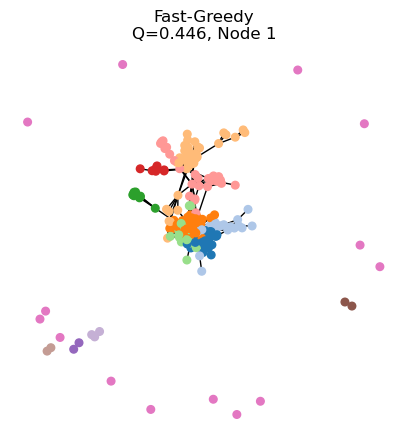

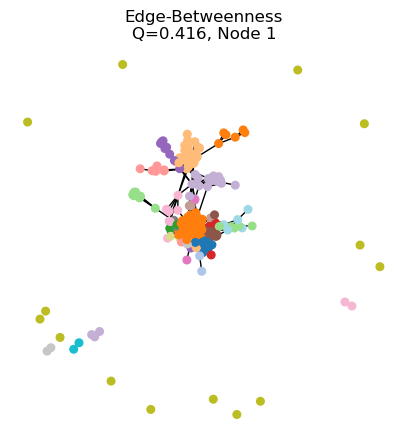

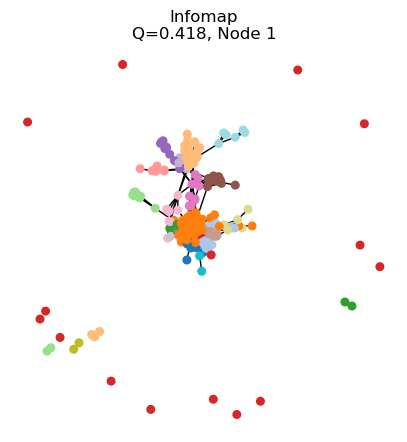


Core node 108: Fast-Greedy Q_mod=0.458, Edge-Betweenness Q_mod=0.521, Infomap Q_mod=0.521


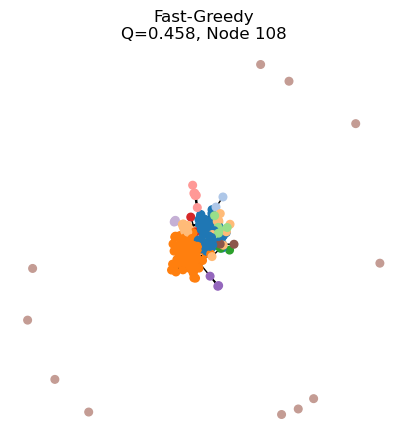

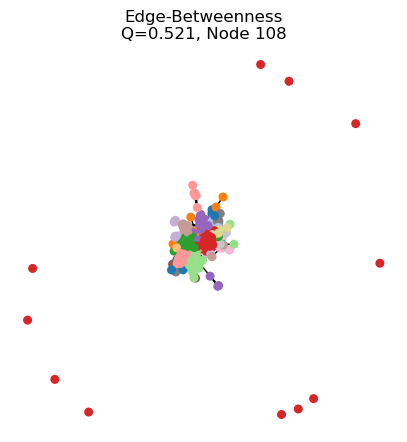

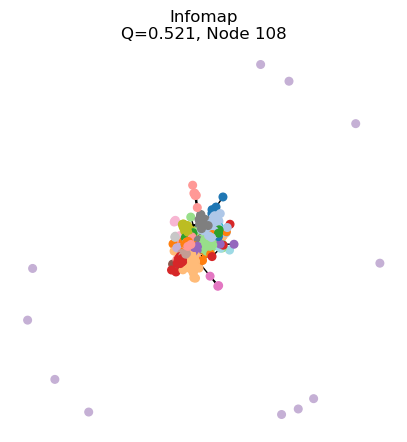


Core node 349: Fast-Greedy Q_mod=0.246, Edge-Betweenness Q_mod=0.151, Infomap Q_mod=0.245


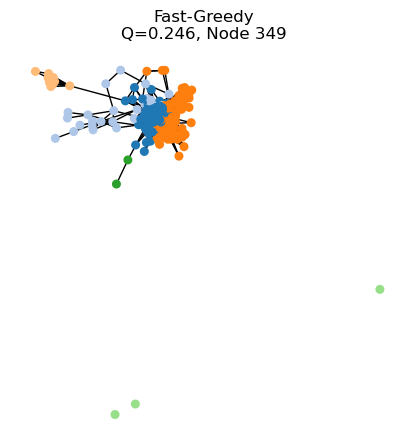

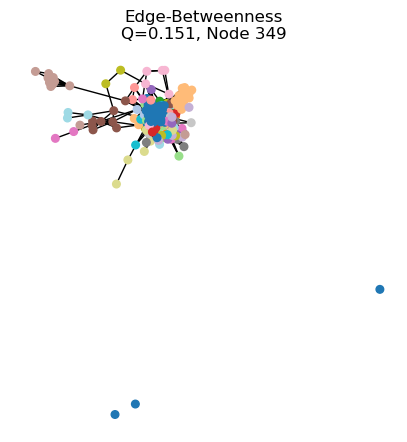

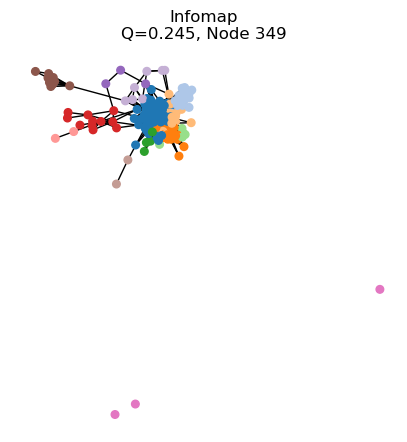


Core node 484: Fast-Greedy Q_mod=0.534, Edge-Betweenness Q_mod=0.515, Infomap Q_mod=0.543


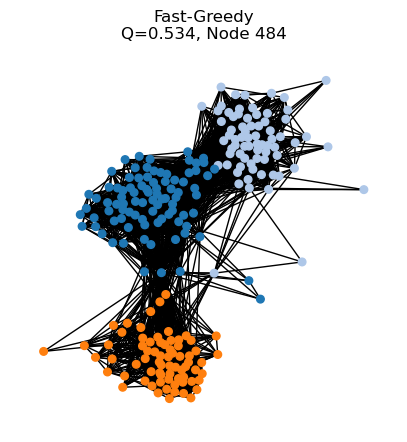

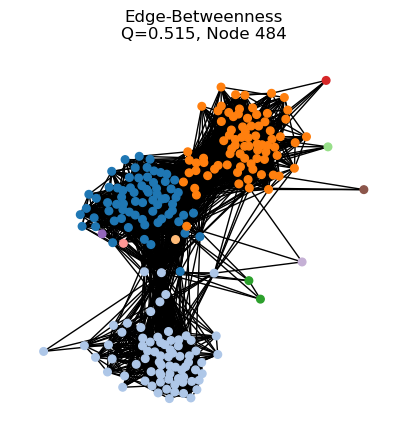

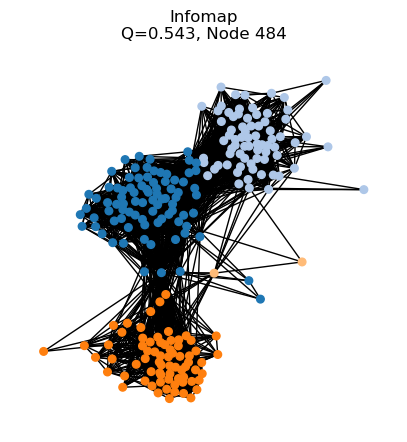


Core node 1087: Fast-Greedy Q_mod=0.148, Edge-Betweenness Q_mod=0.032, Infomap Q_mod=0.027


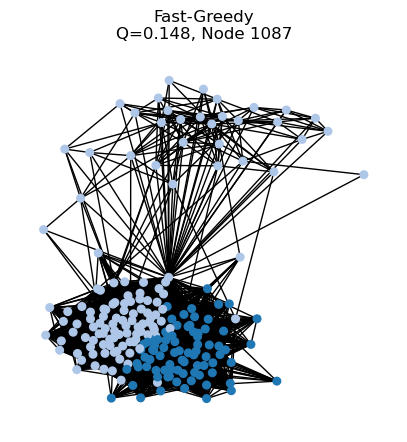

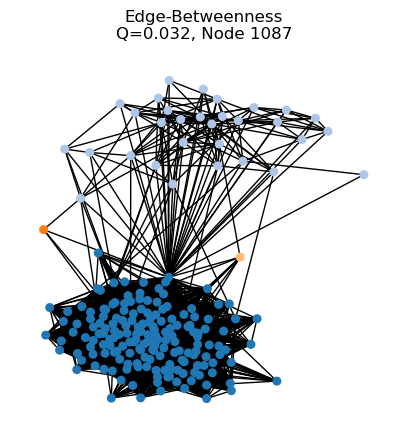

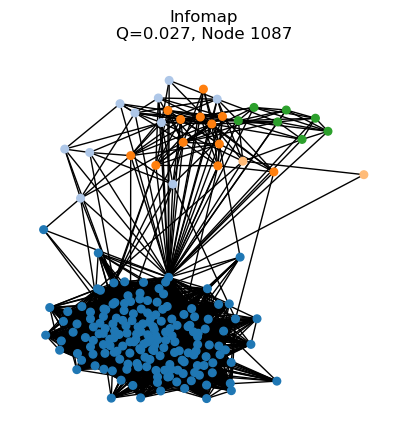

In [4]:
import gzip
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt

# 载入 Facebook 网络
with gzip.open('./facebook_combined.txt.gz','rt') as f:
    G_nx = nx.read_edgelist(f, nodetype=int)

core_ids_proj = [1, 108, 349, 484, 1087]
core_ids      = [i - 1 for i in core_ids_proj]

for nid, proj in zip(core_ids, core_ids_proj):
    # 原始 ego 网络
    ego_nx = nx.ego_graph(G_nx, nid, radius=1)
    ig_orig = ig.Graph.TupleList(ego_nx.edges(), directed=False)
    # ——计算原始模块度（可打印）
    fg_orig = ig_orig.community_fastgreedy().as_clustering()
    eb_orig = ig_orig.community_edge_betweenness().as_clustering()
    im_orig = ig_orig.community_infomap()
    # 删除中心节点
    ego_minus = ego_nx.copy()
    ego_minus.remove_node(nid)
    ig_m = ig.Graph.TupleList(ego_minus.edges(), directed=False)
    
    # 对应三种算法的社区及模块度
    fg_mod = ig_m.community_fastgreedy().as_clustering()
    eb_mod = ig_m.community_edge_betweenness().as_clustering()
    im_mod = ig_m.community_infomap()
    Q_fg_m, Q_eb_m, Q_im_m = (
        ig_m.modularity(fg_mod),
        ig_m.modularity(eb_mod),
        ig_m.modularity(im_mod),
    )
    
    print(f"\nCore node {proj}: Fast-Greedy Q_mod={Q_fg_m:.3f}, "
          f"Edge-Betweenness Q_mod={Q_eb_m:.3f}, Infomap Q_mod={Q_im_m:.3f}")
    
    # 布局
    pos  = nx.spring_layout(ego_minus, seed=42)
    cmap = plt.get_cmap('tab20')
    
    def draw_communities(clusters, title):
        # 构建 node→community 映射
        comm_map = {}
        for cid, comm in enumerate(clusters):
            for vid in comm:
                node_id = int(ig_m.vs[vid]['name'])
                comm_map[node_id] = cid
        # 如果有节点不在 comm_map，则给它们一个默认社区编号
        default_cid = (max(comm_map.values()) + 1) if comm_map else 0
        
        # 生成颜色列表
        colors = []
        for n in ego_minus.nodes():
            cid = comm_map.get(n, default_cid)
            colors.append(cmap(cid % 20))
        
        # 绘图
        fig, ax = plt.subplots(figsize=(5,5))
        nx.draw(ego_minus, pos,
                node_color=colors,
                node_size=30,
                with_labels=False,
                ax=ax)
        ax.set_title(title)
        ax.axis('off')
        plt.show()
    
    # 分别绘制三种算法的结果
    draw_communities(fg_mod, f"Fast-Greedy\nQ={Q_fg_m:.3f}, Node {proj}")
    draw_communities(eb_mod, f"Edge-Betweenness\nQ={Q_eb_m:.3f}, Node {proj}")
    draw_communities(im_mod, f"Infomap\nQ={Q_im_m:.3f}, Node {proj}")


## Question 11

For any non‐core node u in the personalized network P(v) of core node v, its degree in P(v) counts (a) the one edge back to v, plus (b) one edge for each mutual friend. Hence if we let

degₚ(u) = degree of u in the personalized network P(v), and emb(u,v) = number of mutual friends of u and v,

then

degₚ(u) = 1 + emb(u,v)

so equivalently

emb(u,v) = degₚ(u) – 1.

## Question 12

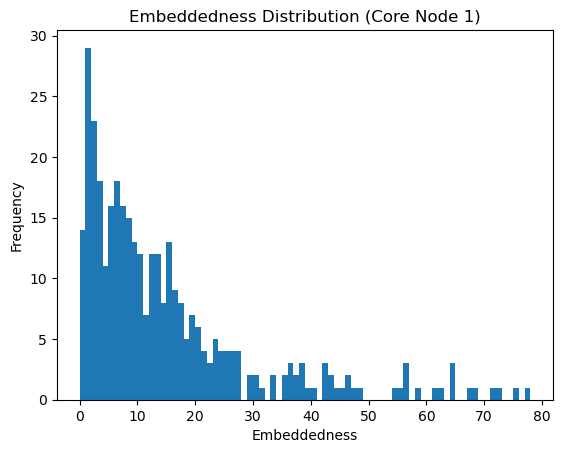

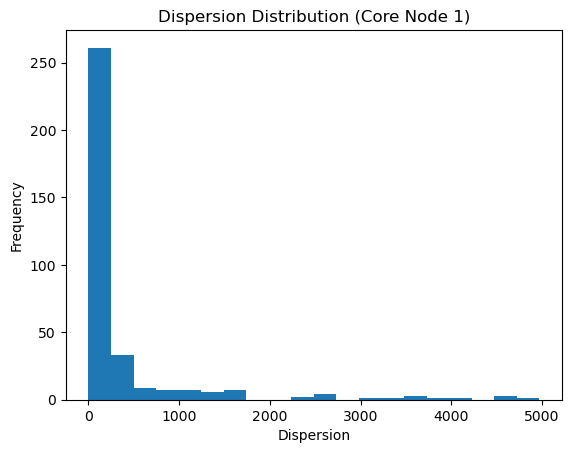

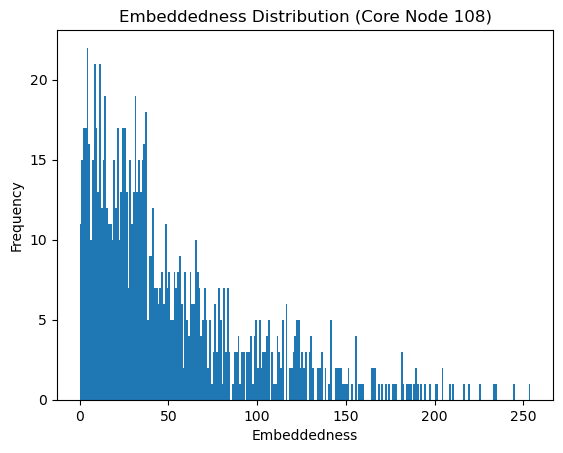

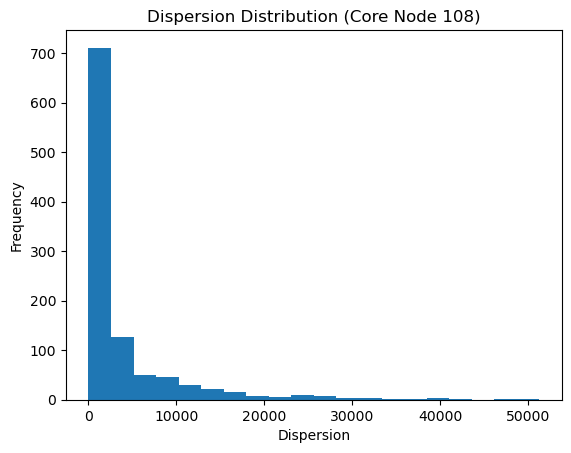

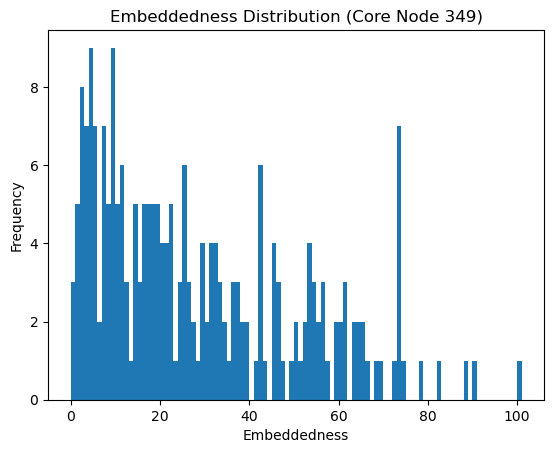

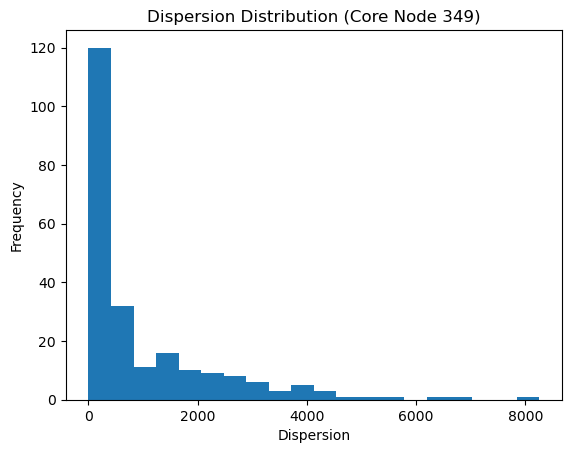

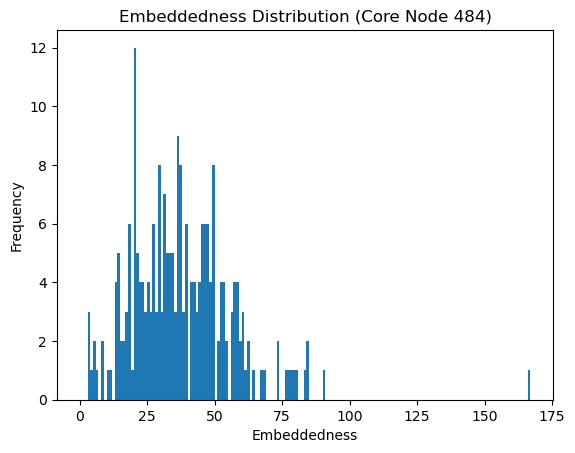

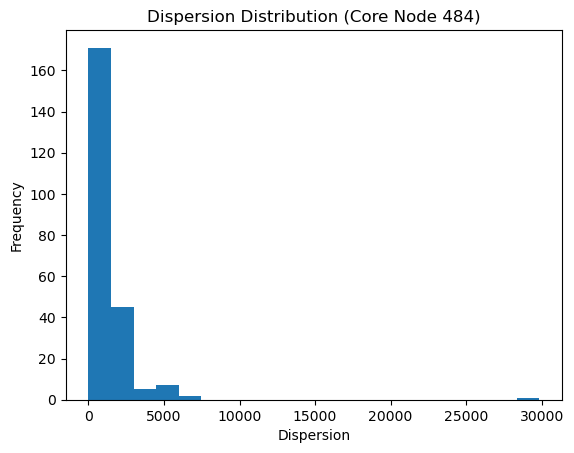

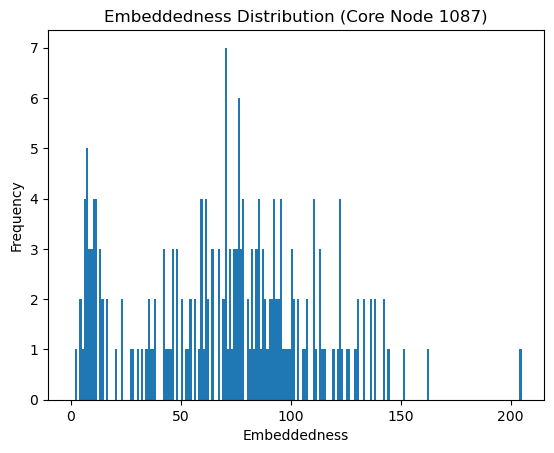

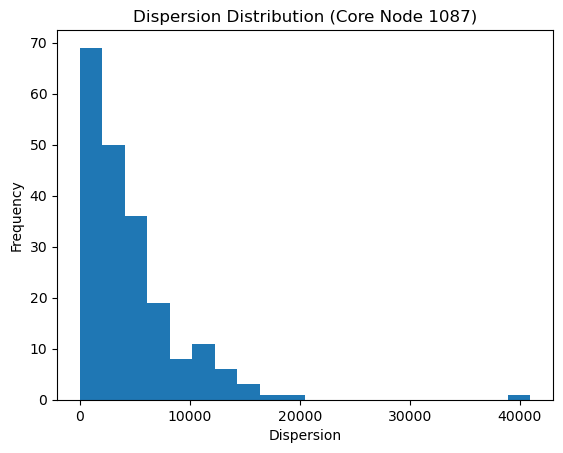

In [1]:
import gzip
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations

# Load Facebook network
with gzip.open('./facebook_combined.txt.gz','rt') as f:
    G = nx.read_edgelist(f, nodetype=int)

# Core nodes (0-based edgelist IDs) and for printing
core_ids = [0, 107, 348, 483, 1086]
core_print = [1, 108, 349, 484, 1087]

# For each core node, compute embeddedness and dispersion for its personalized network
for nid, pid in zip(core_ids, core_print):
    # Personalized network (ego network)
    ego = nx.ego_graph(G, nid, radius=1)
    neighbors_v = set(G.neighbors(nid))
    
    embeddedness = []
    dispersion = []
    
    for u in neighbors_v:
        # Mutual friends of u and v
        mutual = set(G.neighbors(u)).intersection(neighbors_v)
        embeddedness.append(len(mutual))
        
        # Modified graph: remove core node and u from ego network
        M = ego.copy()
        M.remove_node(nid)
        M.remove_node(u)
        
        # Compute dispersion: sum of distances between all pairs in mutual
        disp = 0
        for x, y in combinations(mutual, 2):
            try:
                d = nx.shortest_path_length(M, x, y)
                disp += d
            except nx.NetworkXNoPath:
                continue
        dispersion.append(disp)
    
    # Plot embeddedness histogram
    plt.figure()
    plt.hist(embeddedness, bins=range(max(embeddedness)+2))
    plt.xlabel('Embeddedness')
    plt.ylabel('Frequency')
    plt.title(f'Embeddedness Distribution (Core Node {pid})')
    plt.show()
    
    # Plot dispersion histogram
    plt.figure()
    plt.hist(dispersion, bins=20)
    plt.xlabel('Dispersion')
    plt.ylabel('Frequency')
    plt.title(f'Dispersion Distribution (Core Node {pid})')
    plt.show()

## Question 13

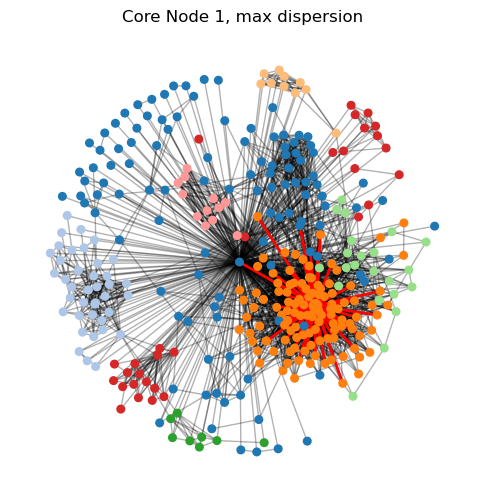

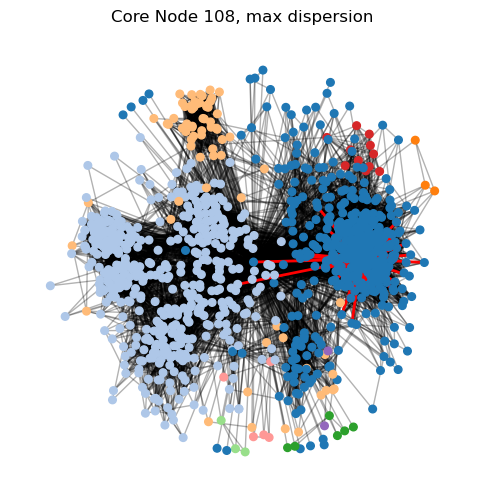

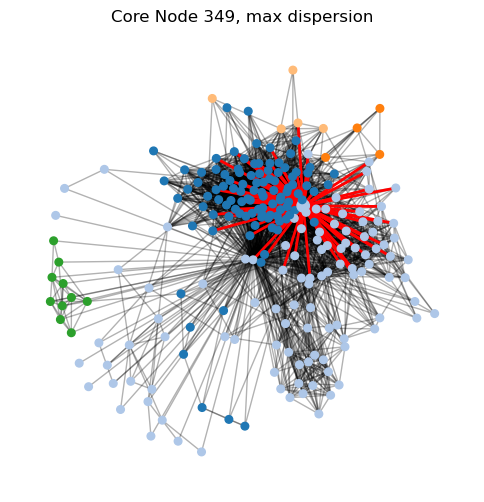

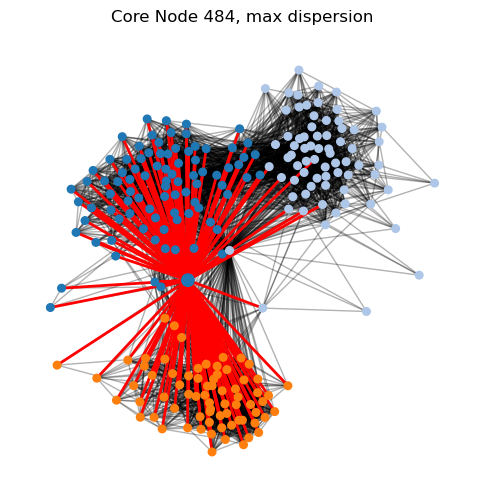

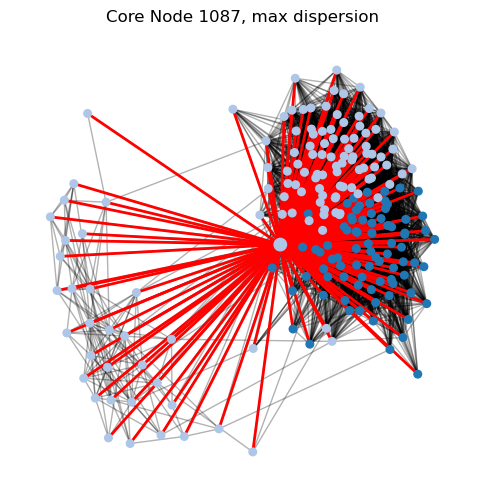

In [3]:
import gzip
import networkx as nx
import igraph as ig
import matplotlib.pyplot as plt
from itertools import combinations

# 载入 Facebook 网络
with gzip.open('./facebook_combined.txt.gz','rt') as f:
    G = nx.read_edgelist(f, nodetype=int)

# 核心节点 ID：项目中给出的 1-based IDs，对应的 0-based edgelist IDs
core_ids_proj = [1, 108, 349, 484, 1087]
core_ids      = [i - 1 for i in core_ids_proj]

for nid, pid in zip(core_ids, core_ids_proj):
    # 构建个性化网络
    ego = nx.ego_graph(G, nid, radius=1)
    neighbors_v = set(G.neighbors(nid))
    
    # 计算每个邻居的 dispersion
    dispersion = {}
    for u in neighbors_v:
        mutual = neighbors_v.intersection(G.neighbors(u))
        if len(mutual) < 2:
            dispersion[u] = 0
        else:
            # 在删除核心节点和 u 后统计所有 mutual 之间的最短路径长度之和
            M = ego.copy()
            M.remove_node(nid)
            M.remove_node(u)
            disp = 0
            for x, y in combinations(mutual, 2):
                try:
                    disp += nx.shortest_path_length(M, x, y)
                except nx.NetworkXNoPath:
                    pass
            dispersion[u] = disp
    
    # 找到 dispersion 最大的节点
    u_max = max(dispersion, key=dispersion.get)
    
    # 社区检测（Fast-Greedy）
    ig_g = ig.Graph.TupleList(ego.edges(), directed=False)
    fg = ig_g.community_fastgreedy().as_clustering()
    
    # 社区映射
    comm_map = {}
    for cid, comm in enumerate(fg):
        for vid in comm:
            node_id = int(ig_g.vs[vid]['name'])
            comm_map[node_id] = cid
    
    # 可视化
    pos = nx.spring_layout(ego, seed=42)
    cmap = plt.get_cmap('tab20')
    
    # 划分边集：高亮 incident edges
    default_edges     = [e for e in ego.edges() if u_max not in e]
    highlighted_edges = [e for e in ego.edges() if u_max in e]
    
    plt.figure(figsize=(6,6))
    # 普通边
    nx.draw_networkx_edges(ego, pos, edgelist=default_edges, alpha=0.3)
    # 高亮边
    nx.draw_networkx_edges(ego, pos, edgelist=highlighted_edges,
                           width=2, edge_color='red')
    # 节点着色
    node_colors = [cmap(comm_map[n] % 20) for n in ego.nodes()]
    # 节点大小：高亮 u_max
    node_sizes  = [80 if n == u_max else 30 for n in ego.nodes()]
    nx.draw_networkx_nodes(ego, pos, node_color=node_colors,
                           node_size=node_sizes)
    
    plt.title(f"Core Node {pid}, max dispersion")
    plt.axis('off')
    plt.show()

## Question 14

Core Node 1: max embeddedness node = 56, max dispersion node = 56


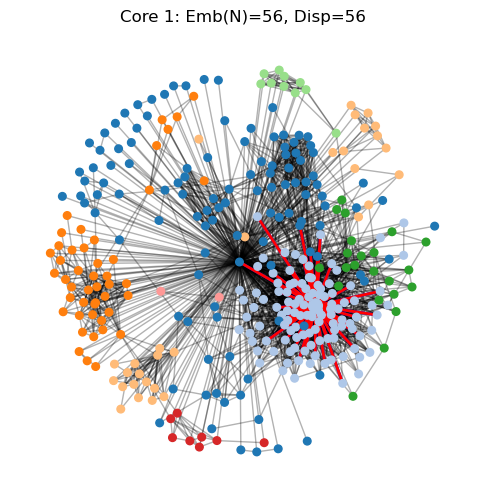

Core Node 108: max embeddedness node = 1888, max dispersion node = 1888


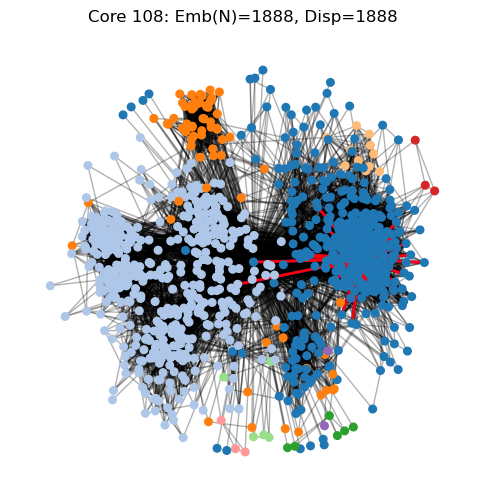

Core Node 349: max embeddedness node = 376, max dispersion node = 376


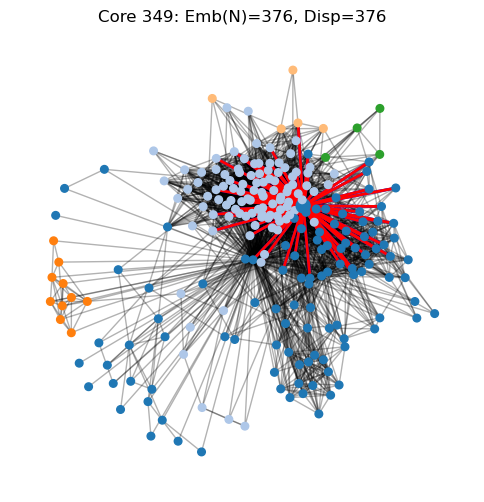

Core Node 484: max embeddedness node = 107, max dispersion node = 107


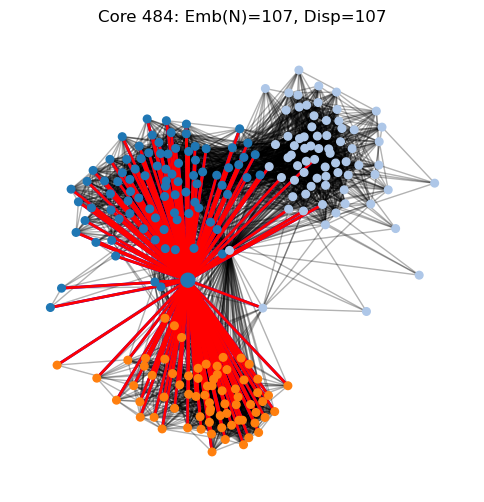

Core Node 1087: max embeddedness node = 107, max dispersion node = 107


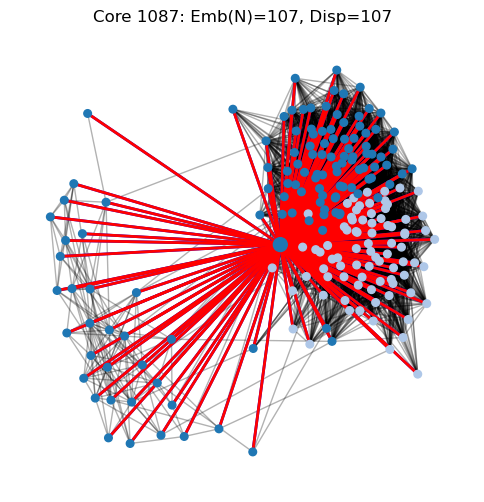

In [4]:
import gzip
import networkx as nx
import matplotlib.pyplot as plt
from itertools import combinations
from networkx.algorithms.community import greedy_modularity_communities

# —— 配置你的文件路径 —— 
load_path = "./facebook_combined.txt.gz"

# 载入 Facebook 网络
with gzip.open(load_path, 'rt') as f:
    G = nx.read_edgelist(f, nodetype=int)

# 核心节点：0-based ID 和对应 1-based 打印 ID
core_ids_proj = [1, 108, 349, 484, 1087]
core_ids      = [i - 1 for i in core_ids_proj]

for nid, pid in zip(core_ids, core_ids_proj):
    # 构建个性化网络
    ego = nx.ego_graph(G, nid, radius=1)
    neighbors_v = set(G.neighbors(nid))
    
    # 计算 embeddedness 和 dispersion
    embeddedness = {}
    dispersion   = {}
    for u in neighbors_v:
        mutual = neighbors_v.intersection(G.neighbors(u))
        embeddedness[u] = len(mutual)
        if len(mutual) < 2:
            dispersion[u] = 0
        else:
            M = ego.copy()
            M.remove_node(nid)
            M.remove_node(u)
            disp = 0
            for x, y in combinations(mutual, 2):
                try:
                    disp += nx.shortest_path_length(M, x, y)
                except nx.NetworkXNoPath:
                    pass
            dispersion[u] = disp
    
    # 找到最大嵌入度（排除零）和最大扩散度节点
    emb_nodes = {u: e for u, e in embeddedness.items() if e > 0}
    u_max_emb = max(emb_nodes, key=emb_nodes.get) if emb_nodes else None
    u_max_disp = max(dispersion, key=dispersion.get)
    
    print(f"Core Node {pid}: max embeddedness node = {u_max_emb}, max dispersion node = {u_max_disp}")
    
    # 进行 Fast-Greedy 社区检测
    fg_comms = list(greedy_modularity_communities(ego))
    comm_map = {n: cid for cid, comm in enumerate(fg_comms) for n in comm}
    
    # 可视化
    pos = nx.spring_layout(ego, seed=42)
    cmap = plt.get_cmap('tab20')
    
    # 边集分离
    default_edges     = [e for e in ego.edges() if u_max_emb not in e and u_max_disp not in e]
    emb_edges         = [e for e in ego.edges() if u_max_emb in e]
    disp_edges        = [e for e in ego.edges() if u_max_disp in e]
    
    # 绘制
    fig, ax = plt.subplots(figsize=(6,6))
    # 普通边
    nx.draw_networkx_edges(ego, pos, edgelist=default_edges, alpha=0.3, ax=ax)
    # 嵌入度节点的边 (蓝)
    if u_max_emb is not None:
        nx.draw_networkx_edges(ego, pos, edgelist=emb_edges, width=2, edge_color='blue', ax=ax)
    # 扩散度节点的边 (红)
    nx.draw_networkx_edges(ego, pos, edgelist=disp_edges, width=2, edge_color='red', ax=ax)
    # 节点着色
    colors = [cmap(comm_map[n] % 20) for n in ego.nodes()]
    sizes  = [100 if n in (u_max_emb, u_max_disp) else 30 for n in ego.nodes()]
    nx.draw_networkx_nodes(ego, pos, node_color=colors, node_size=sizes, ax=ax)
    
    ax.set_title(f"Core {pid}: Emb(N)={u_max_emb}, Disp={u_max_disp}")
    ax.axis('off')
    plt.show()

## Question 15

From our plots in Q13 (red highlights) and Q14 (blue highlights), we see two distinct roles:

Embeddedness

  The node with the highest embeddedness sits deep inside one densely connected pocket of the core’s friends.

  It shares many mutual friends who are themselves all tightly linked—so removing it wouldn’t break up that pocket.

  Interpretation: high embeddedness ⇒ a “core clique” member, redundantly connected within one community.

Dispersion

  The node with the highest dispersion reaches out into multiple, otherwise separate friend‐clusters.

  Its incident edges (red) span across different colored communities, so without it those clusters would drift apart.

  Interpretation: high dispersion ⇒ a “bridge” or “broker,” holding together disparate parts of the core’s network.

When they coincide

  Occasionally the same node tops both measures—meaning it’s both deeply embedded in one clique and links out to others.

  Such a node combines the redundancy of a core member with the reach of a bridge.

In short, embeddedness flags who is most locally connected, while dispersion flags who is most globally connective across communities.

## Question 16

In [5]:
import gzip
import networkx as nx

# 1) Load the Facebook graph
with gzip.open('./facebook_combined.txt.gz','rt') as f:
    G = nx.read_edgelist(f, nodetype=int)

# 2) Build the personalized network for node 415 (0-based ID 414)
ego = nx.ego_graph(G, 414, radius=1)

# 3) Find all nodes in this ego‐network whose degree is exactly 24
Nr = [n for n,d in ego.degree() if d == 24]

# 4) Report its length
print(f"|Nr| = {len(Nr)}")

|Nr| = 11


## Question 17

In [9]:
import gzip
import networkx as nx
import random
import numpy as np

# === CONFIGURE THIS PATH ===
load_path = './facebook_combined.txt.gz'

# Load Facebook graph
with gzip.open(load_path, 'rt') as f:
    G = nx.read_edgelist(f, nodetype=int)

# Build personalized network for node ID 415 (0-based 414)
ego = nx.ego_graph(G, 414, radius=1)

# List Nr: nodes in ego with degree exactly 24
Nr = [n for n, d in ego.degree() if d == 24]
print(f"|Nr| = {len(Nr)}")

# Helper functions for measures on graph H
def common_neighbors_score(H, i, j):
    return len(list(nx.common_neighbors(H, i, j)))

def jaccard_score(H, i, j):
    union_size = len(set(H.neighbors(i)).union(H.neighbors(j)))
    if union_size == 0:
        return 0
    inter_size = len(set(H.neighbors(i)).intersection(H.neighbors(j)))
    return inter_size / union_size

def adamic_adar_score(H, i, j):
    return sum(1 / np.log(len(list(H.neighbors(z))))
               for z in nx.common_neighbors(H, i, j)
               if len(list(H.neighbors(z))) > 1)

# Run simulation for each algorithm
random.seed(42)
results = {'common': [], 'jaccard': [], 'adamic': []}

for i in Nr:
    accuracies = {'common': [], 'jaccard': [], 'adamic': []}
    for _ in range(10):
        # Ensure at least one edge removed
        while True:
            # Randomly remove each friend with p=0.25
            current_friends = list(ego.neighbors(i))
            removed = [u for u in current_friends if random.random() < 0.25]
            if removed:
                break
        
        # Create modified network H
        H = ego.copy()
        for u in removed:
            H.remove_edge(i, u)
        
        # Candidates: nodes not equal to i and not currently friends
        candidates = [n for n in H.nodes() if n != i and not H.has_edge(i, n)]
        t = len(removed)
        
        # Compute scores and recommend top t for each measure
        scores_common = [(common_neighbors_score(H, i, j), j) for j in candidates]
        scores_jaccard = [(jaccard_score(H, i, j), j) for j in candidates]
        scores_adamic = [(adamic_adar_score(H, i, j), j) for j in candidates]
        
        # Recommend
        top_common = [j for _, j in sorted(scores_common, reverse=True)[:t]]
        top_jaccard = [j for _, j in sorted(scores_jaccard, reverse=True)[:t]]
        top_adamic = [j for _, j in sorted(scores_adamic, reverse=True)[:t]]
        
        # Calculate accuracies
        set_removed = set(removed)
        accuracies['common'].append(len(set(top_common) & set_removed) / t)
        accuracies['jaccard'].append(len(set(top_jaccard) & set_removed) / t)
        accuracies['adamic'].append(len(set(top_adamic) & set_removed) / t)
    
    # Average for user i
    results['common'].append(np.mean(accuracies['common']))
    results['jaccard'].append(np.mean(accuracies['jaccard']))
    results['adamic'].append(np.mean(accuracies['adamic']))

# Compute overall average accuracy
avg_common = np.mean(results['common'])
avg_jaccard = np.mean(results['jaccard'])
avg_adamic = np.mean(results['adamic'])

print(f"Average accuracy:")
print(f" Common Neighbors: {avg_common:.4f}")
print(f" Jaccard:          {avg_jaccard:.4f}")
print(f" Adamic-Adar:      {avg_adamic:.4f}")

# Determine best
best = max(
    ('Common Neighbors', avg_common),
    ('Jaccard', avg_jaccard),
    ('Adamic-Adar', avg_adamic),
    key=lambda x: x[1]
)
print(f"\nBest algorithm: {best[0]} (accuracy {best[1]:.4f})")


|Nr| = 11
Average accuracy:
 Common Neighbors: 0.8274
 Jaccard:          0.7885
 Adamic-Adar:      0.8196

Best algorithm: Common Neighbors (accuracy 0.8274)
